## P452 Endsem

### Dibya Bharati Pradhan
### 1911067

In [117]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%run C_Library_Endsem.ipynb

## Q1

In [118]:

import numpy as np


#read txt file with three columns using pandas

file = 'endsemfit.txt'
data = pd.read_csv(file, header=None, sep='\s+')
time = data[0]
counts = data[1]
uncertainties = data[2]

print(data)


     0    1   2
0    1  106  10
1   15   80   9
2   30   98  10
3   45   75   9
4   60   74   8
5   75   73   8
6   90   49   7
7  105   38   6
8  120   37   6
9  135   22   5


Source's lifetime is = 96.36253898605243 seconds
Error = 1237.6943167016736 seconds

The fit is not acceptable at 5% level of significance.


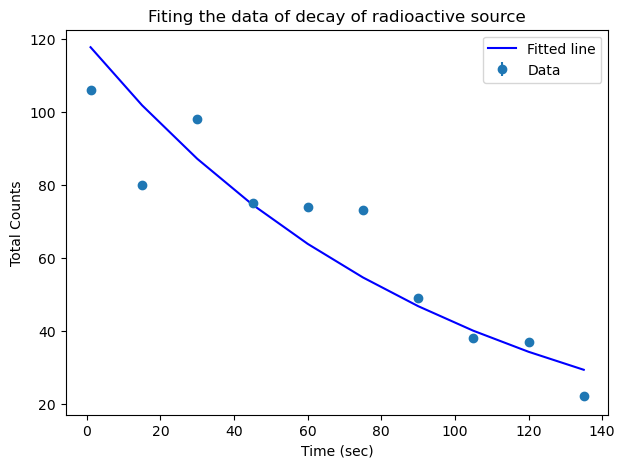

In [119]:

# Calculate slope and intercept
slope = (len(time) * np.sum(time * np.log(counts)) - np.sum(time) * np.sum(np.log(counts))) / (len(time) * np.sum(time**2) - np.sum(time) ** 2)
intercept = (np.sum(np.log(counts)) * np.sum(time**2) - np.sum(time) * np.sum(time * np.log(counts))) / (len(time) * np.sum(time**2) - np.sum(time) ** 2)

residuals = np.log(counts) - (intercept + slope * time)                                     # Calculate residuals
SSR = np.sum(residuals ** 2)                                                                # Calculate sum of squared residuals
std_err_slope = np.sqrt(SSR / (len(time) - 2)) / np.sqrt(np.sum((time - np.mean(time))**2))       # Calculate standard error of the slope

# Calculate lifetime
lifetime = -1 / slope

# Calculate error in lifetime
error_lifetime = (std_err_slope / (slope ** 2)) * lifetime

# Degrees of freedom
dof = len(time) - 2

# Calculate critical χ² value at 95% confidence level
critical_chi_squared = 16.919

# Calculate χ² value for the fit
expected_counts = np.exp(intercept + slope * time)
chi_squared_value = np.sum(((counts - expected_counts) / uncertainties) ** 2)

# Print results
print("Source's lifetime is =", lifetime, "seconds")
print("Error =", error_lifetime, "seconds")
print()

# Determine if fit is acceptable at 5% level of significance
if chi_squared_value < critical_chi_squared:
    print("The fit is acceptable at 5% level of significance.")
else:
    print("The fit is not acceptable at 5% level of significance.")
fitted_counts = np.exp(intercept + slope * time)

# Plot the data and the fitted line
plt.figure(figsize=(7, 5))
plt.errorbar(time, counts, yerr=1/np.sqrt(counts), fmt='o', label='Data')
plt.plot(time, fitted_counts, label='Fitted line', color='blue')
plt.xlabel('Time (sec)')
plt.ylabel('Total Counts')
plt.title('Fiting the data of decay of radioactive source')
plt.legend()
plt.show()


## Q2

In [120]:
# Define the function g(x), this has to be input by the user
def func1(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return R*T/(p+(a/(V**2))) + b

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(func1, initial_guess, eps)

print ("\nFixed Point Method 1")
print("Initial guess for 1st trial = "+str(initial_guess))


print(f"Root of the equation = {ROUND(root, 4)}")
print(f"Number of iterations = {Num_iter}")


def func2(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return math.sqrt(a/(R*T/(V-b) - p))

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(func2, initial_guess, eps)

print ("\nFixed Point Method 2")
print("Initial guess for 2nd trial = "+str(initial_guess))


print(f"Root of the equation = {ROUND(root, 4)}")
print(f"Number of iterations = {Num_iter}")


Fixed Point Method 1
Initial guess for 1st trial = 1.0
Root of the equation = 3.9299
Number of iterations = 10

Fixed Point Method 2
Initial guess for 2nd trial = 1.0
Root of the equation = 0.1857
Number of iterations = 36


### So, we get two different solutions with two different fixed point method equations

## Q6

In [121]:
## using RNG and accept/reject method to generate random numbers

def random_gen(a,m,i,f,x0=1):
    Ran=random_genQ1(a,m,x0)
    return(i+(f-i)*Ran)



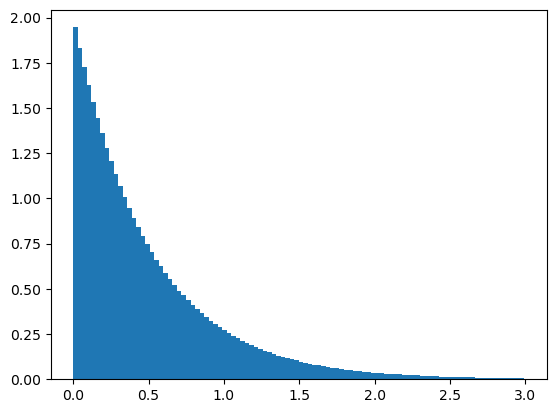

In [122]:
def func3_1(x):
    return(-0.5*np.log(1-(1-np.exp(-6))*x))

t1=func3_1(random_gen(439,1000000,0,1))
plt.hist(t1,100,density=True)
plt.show()


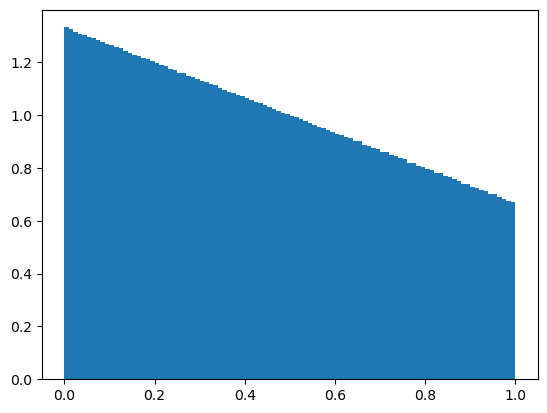

In [123]:
def func3_2(x):
    return(2-0.5*np.sqrt(16-12*x))

t2=func3_2(random_gen(439,1000000,0,1))
plt.hist(t2,100,density=True)
plt.show()


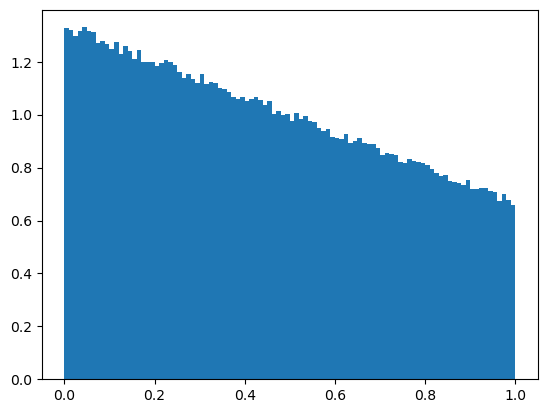

In [124]:
def func3_3(x):
    # return gaussian function
    return(np.exp(-x**2))

def func3_4(x):
    a = 2
    return 0.5*(a**2-x**2)
    #return quadratic function
    

def accept_reject_ran_gen(f,g,c,N):
    X=func3_2(random_gen(439,100*N,0,1))
    U=random_gen(469,100*N,0,1)
    Z=[]
    i=0
    while len(Z)<N:
        if U[i]<=f(X[i])/(c*g(X[i])):
            Z.append(X[i])
        i+=1
    return(np.array(Z))

t3=accept_reject_ran_gen(func3_4,func3_3,2,500000)

plt.hist(t3,100,density=True)
plt.show()

## Q5

In [125]:
def Power(Mat, vect_X, vect_Y):

    MatX = np.dot(Mat, vect_X)
    MatXY = np.dot(MatX, vect_Y)
    return MatX, MatXY

def Power_eval_evect(A, x0, y, eps=1e-6):

    mult = copy.deepcopy(A)
    eval_prev = 2
    v, eval_curr = Power(mult, x0, y)
    v_prev = eval_prev
    v_curr = eval_curr / eval_prev
    count = 1
    
    while abs(v_curr - v_prev) > eps and count < 100:
        eval_prev = eval_curr
        mult_next = np.dot(mult, A)
        mult = mult_next
        v, eval_curr = Power(mult, x0, y)
        v_prev = v_curr
        v_curr = eval_curr / eval_prev
        count += 1

    norm = np.sqrt(np.sum(np.square(v)))
    
    v = v / norm

    return v_curr, v, count

In [126]:
## read matrix from endsemmat.txt

file = 'endsemmat.txt'
data = pd.read_csv(file, header=None, sep='\s+')
matrix = data.values
print(matrix)

[[ 2 -1  0  0  0]
 [-1  2 -1  0  0]
 [ 0 -1  2 -1  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  2]]


In [127]:


## find the first two largest eigenvalues and corresponding eigenvectors using power iteration method

tol = 1e-6
x0 = np.ones(len(matrix))      # initial guess vector
y = x0

# call power method to find the first largest eigenvalue and corresponding eigenvector

evalue1, evec1, c = Power_eval_evect(matrix, x0, y, tol)
print("Dominant eigenvalue = ", np.round(evalue1, 4))
print("Corresponding normalised eigenvector = ", np.round(evec1, 4))
print("No of iterations = ", c)

# call power method to find the second largest eigenvalue and corresponding eigenvector

matrix = matrix - evalue1 * np.outer(evec1, evec1)
evalue2, evec2, c = Power_eval_evect(matrix, x0, y, tol)
print("Second largest eigenvalue = ", np.round(evalue2, 4))
print("Corresponding normalised eigenvector = ", np.round(evec2, 4))
print("No of iterations = ", c)


Dominant eigenvalue =  1.0
Corresponding normalised eigenvector =  [ 0.6325 -0.3162  0.     -0.3162  0.6325]
No of iterations =  2
Second largest eigenvalue =  3.3963
Corresponding normalised eigenvector =  [-0.1333  0.4879 -0.6988  0.4879 -0.1333]
No of iterations =  26


In [128]:
# check if the eigenvalues satisfy the following

def func(k):
    a=-1
    c=-1
    b=2
    n=5
    lamda = b + 2*np.sqrt(a*c)*np.cos((k*np.pi)/n+1)
    return lamda

k = [1,2,3,4,5]
for i in k:
    print("Eigenvalue for k = ", i, " is ", func(i))

Eigenvalue for k =  1  is  1.8850190248903813
Eigenvalue for k =  2  is  0.7333522624767519
Eigenvalue for k =  3  is  0.06550188402384771
Eigenvalue for k =  4  is  0.1365640347011976
Eigenvalue for k =  5  is  0.9193953882637205


## Q7

In [129]:
# use variational monte carlo method to solve simple harmonic oscillator using a trial wave function

def trial_wave(x, alpha):
    return 0.5*(alpha**2-x**2)


def local_energy(x, alpha):
    return alpha + x**2*(0.5 - 2*alpha**2)

def metropolis(x, alpha, delta):
    x_new = x + delta*(np.random.rand() - 0.5)
    if np.random.rand() < trial_wave(x_new, alpha)**2/trial_wave(x, alpha)**2:
        return x_new
    return x

def VMC(alpha, delta, N):
    x = 0
    E = 0
    for i in range(N):
        x = metropolis(x, alpha, delta)
        E += local_energy(x, alpha)
    return E/N

alpha = 2      #variational parameter
delta = 0.02  #step size
N = 20000    #20k steps
print("Energy as calculated from simple hamonic oscillator is = ", VMC(alpha, delta, N))


Energy as calculated from simple hamonic oscillator is =  0.6688157084949303
